In [1]:
min=15
print(str(min)+'min')

15min


In [2]:
import codigo
from codigo import utils
from codigo import model_utils

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

# Importar Dataset depurado

In [4]:
df_Inicial = pd.read_csv(r'dataset/generado/datasetDepurado.csv')

# Revisamos las columnas que contiene el Dataset

In [5]:
df_Inicial.head()

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99.0
1,LIB193263,2020-06-09 19:23:00,92.0
2,LIB193263,2020-06-09 19:38:00,86.0
3,LIB193263,2020-06-09 19:53:00,85.0
4,LIB193263,2020-06-09 20:08:00,85.0


In [6]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID             object 
 1   Date           object 
 2   Glucose level  float64
dtypes: float64(1), object(2)
memory usage: 67.9+ MB


### Cambiamos el formato de la columna Date de object a datetime64

In [7]:
df_Inicial['Date']=pd.to_datetime(df_Inicial['Date'])

In [8]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             object        
 1   Date           datetime64[ns]
 2   Glucose level  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 67.9+ MB


In [9]:
df_Inicial['Date'].min()

Timestamp('2018-01-06 00:31:00')

In [10]:
df_Inicial['Date'].max()

Timestamp('2022-03-20 23:58:00')

In [11]:
df=df_Inicial

In [12]:
features=['Glucose level','Yt','hour','pod_id','level_id']

In [13]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))
scalerHours = load(open('dataset/generado/scalerHours.scaler', 'rb'))
scalerMin = load(open('dataset/generado/scalerMin.scaler', 'rb'))
scalerPodId = load(open('dataset/generado/scalerPodId.scaler', 'rb'))
scalerLevelId = load(open('dataset/generado/scalerLevelId.scaler', 'rb'))

# Generación de Dataset General

In [14]:
dfIDPacientesTest = pd.read_csv(r'dataset/generado/IDs_Test.csv')
dfIDPacientesTest

,ID
0,LIB193358
1,LIB193317
2,LIB193271
3,LIB193392
4,LIB193353
5,LIB193274
6,LIB193378
7,LIB193330
8,LIB193325
9,LIB193376


In [15]:
lag=30
dfCopy = df.copy()
dfGen=pd.DataFrame()
strMin=str(15)+'min'
for pacienteID in dfIDPacientesTest['ID']: 
    data=utils.getDataPatient(dfCopy,pacienteID,strMin,True,True)
    data['level_label'] = data['Glucose level'].apply(utils.label_LevelBG) 
    if(len(data['Glucose level'])>=lag):
        dfGen = pd.concat([dfGen, data])

In [16]:
dfGen

,Glucose level,ID,Date,level_label
Date,,,,
2021-02-05 11:45:00,211.0,LIB193358,2021-02-05 11:45:00,hyperglycemia
2021-02-05 12:00:00,218.0,LIB193358,2021-02-05 12:00:00,hyperglycemia
2021-02-05 12:15:00,220.0,LIB193358,2021-02-05 12:15:00,hyperglycemia
2021-02-05 12:30:00,231.0,LIB193358,2021-02-05 12:30:00,hyperglycemia
2021-02-05 12:45:00,246.0,LIB193358,2021-02-05 12:45:00,hyperglycemia
...,...,...,...,...
2022-02-17 08:15:00,137.0,LIB193365,2022-02-17 08:15:00,normal
2022-02-17 08:30:00,177.0,LIB193365,2022-02-17 08:30:00,normal
2022-02-17 08:45:00,198.0,LIB193365,2022-02-17 08:45:00,hyperglycemia


In [17]:
dfGen['Glucose level'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 478281 entries, 2021-02-05 11:45:00 to 2022-02-17 09:15:00
Series name: Glucose level
Non-Null Count   Dtype  
--------------   -----  
297626 non-null  float64
dtypes: float64(1)
memory usage: 7.3 MB


In [18]:
dfGen=dfGen.dropna()
dfGen['Glucose level'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 297626 entries, 2021-02-05 11:45:00 to 2022-02-17 09:15:00
Series name: Glucose level
Non-Null Count   Dtype  
--------------   -----  
297626 non-null  float64
dtypes: float64(1)
memory usage: 4.5 MB


In [19]:
dfPacienteCount= pd.DataFrame(dfGen.ID.value_counts().sort_values(ascending=False))
dfPacienteCount

,ID
LIB193358,15136
LIB193317,14865
LIB193271,14853
LIB193392,13607
LIB193353,13079
LIB193274,11792
LIB193330,11285
LIB193325,11144
LIB193376,10671
LIB193344,10343


<AxesSubplot:ylabel='level_label'>

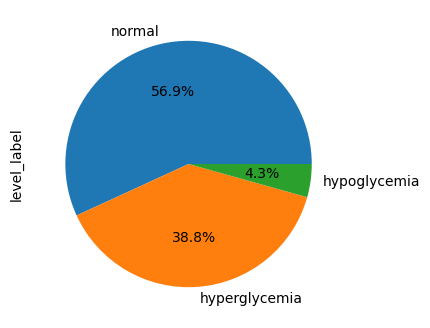

In [20]:
dfGen['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

In [21]:
ObjRangeDateStart='2021-12-16';
ObjRangeDateEnd='2021-12-16';
dfGenPacientes1=dfGen.loc[ObjRangeDateStart:ObjRangeDateEnd]
dfGenPacientes1['ID'].value_counts()

LIB193317    96
LIB193392    96
LIB193378    96
LIB193303    96
LIB193379    95
LIB193393    95
LIB193279    95
LIB193337    91
LIB193325    89
LIB193345    84
LIB193326    81
Name: ID, dtype: int64

<AxesSubplot:ylabel='level_label'>

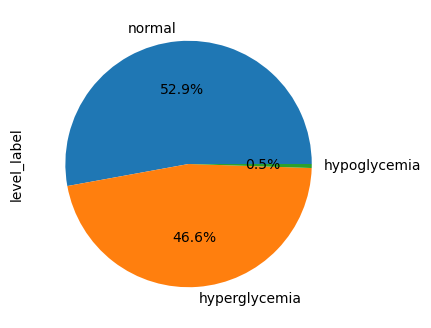

In [36]:
dfGenPacientes1IDs=['LIB193317','LIB193392','LIB193378','LIB193303']

lag=30
dfCopy = dfGenPacientes1.copy()
dfGenP1=pd.DataFrame()
strMin=str(15)+'min'
for pacienteID in dfGenPacientes1IDs: 
    
    data=utils.getDataPatient(dfCopy,pacienteID,strMin,True)
    data['level_label'] = data['Glucose level'].apply(utils.label_LevelBG) 
    if(len(data['Glucose level'])>=lag):
        dfGenP1 = pd.concat([dfGenP1, data])
dfGenP1['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

In [32]:
dfGenP1

,Glucose level,ID,level_label
Date,,,
2021-12-16 00:00:00,169.0,LIB193317,normal
2021-12-16 00:15:00,167.0,LIB193317,normal
2021-12-16 00:30:00,160.0,LIB193317,normal
2021-12-16 00:45:00,152.0,LIB193317,normal
2021-12-16 01:00:00,142.0,LIB193317,normal
...,...,...,...
2021-12-16 22:45:00,138.0,LIB193303,normal
2021-12-16 23:00:00,148.0,LIB193303,normal
2021-12-16 23:15:00,160.0,LIB193303,normal


In [25]:
ObjRangeDateStart='2022-2-11';
ObjRangeDateEnd='2022-2-11';
dfGenPacientes2=dfGen.loc[ObjRangeDateStart:ObjRangeDateEnd]
dfGenPacientes2['ID'].value_counts()

LIB193392    96
LIB193274    96
LIB193306    96
LIB193365    96
LIB193363    95
LIB193319    95
LIB193317    94
LIB193272    94
LIB193352    90
LIB193326    80
LIB193345    66
LIB193343    62
LIB193337    46
LIB193328    36
LIB193271    21
Name: ID, dtype: int64

<AxesSubplot:ylabel='level_label'>

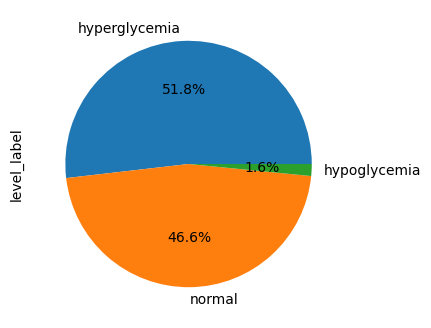

In [34]:
dfGenPacientes2IDs=['LIB193392','LIB193274','LIB193306','LIB193365']

lag=30
dfCopy = dfGenPacientes2.copy()
dfGenP2=pd.DataFrame()
strMin=str(15)+'min'
for pacienteID in dfGenPacientes2IDs: 
    
    data=utils.getDataPatient(dfCopy,pacienteID,strMin,True)
    data['level_label'] = data['Glucose level'].apply(utils.label_LevelBG) 
    if(len(data['Glucose level'])>=lag):
        dfGenP2 = pd.concat([dfGenP2, data])
dfGenP2['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

In [35]:
dfGenP2

,Glucose level,ID,level_label
Date,,,
2022-02-11 00:00:00,143.0,LIB193392,normal
2022-02-11 00:15:00,145.0,LIB193392,normal
2022-02-11 00:30:00,150.0,LIB193392,normal
2022-02-11 00:45:00,156.0,LIB193392,normal
2022-02-11 01:00:00,161.0,LIB193392,normal
...,...,...,...
2022-02-11 22:45:00,409.0,LIB193365,hyperglycemia
2022-02-11 23:00:00,403.0,LIB193365,hyperglycemia
2022-02-11 23:15:00,399.0,LIB193365,hyperglycemia


In [27]:
ObjRangeDateStart='2021-10-15';
ObjRangeDateEnd='2021-10-15';
dfGenPacientes3=dfGen.loc[ObjRangeDateStart:ObjRangeDateEnd]
dfGenPacientes3['ID'].value_counts()

LIB193317    96
LIB193353    96
LIB193325    96
LIB193284    96
LIB193378    95
LIB193338    95
LIB193281    93
LIB193387    92
LIB193375    91
LIB193344    79
Name: ID, dtype: int64

<AxesSubplot:ylabel='level_label'>

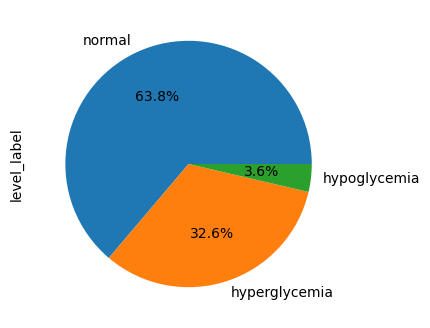

In [37]:
dfGenPacientes3IDs=['LIB193317','LIB193353','LIB193325','LIB193284']

lag=30
dfCopy = dfGenPacientes3.copy()
dfGenP3=pd.DataFrame()
strMin=str(15)+'min'
for pacienteID in dfGenPacientes3IDs: 
    
    data=utils.getDataPatient(dfCopy,pacienteID,strMin,True)
    data['level_label'] = data['Glucose level'].apply(utils.label_LevelBG) 
    if(len(data['Glucose level'])>=lag):
        dfGenP3 = pd.concat([dfGenP3, data])
dfGenP3['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

In [38]:
dfGenP3

,Glucose level,ID,level_label
Date,,,
2021-10-15 00:00:00,207.0,LIB193317,hyperglycemia
2021-10-15 00:15:00,203.0,LIB193317,hyperglycemia
2021-10-15 00:30:00,198.0,LIB193317,hyperglycemia
2021-10-15 00:45:00,190.0,LIB193317,hyperglycemia
2021-10-15 01:00:00,182.0,LIB193317,hyperglycemia
...,...,...,...
2021-10-15 22:45:00,86.0,LIB193284,normal
2021-10-15 23:00:00,87.0,LIB193284,normal
2021-10-15 23:15:00,93.0,LIB193284,normal


In [41]:
dfGenAllPacientes=pd.DataFrame()
dfGenAllPacientes = pd.concat([dfGenP1,dfGenP2,dfGenP3])
dfGenAllPacientes

,Glucose level,ID,level_label
Date,,,
2021-12-16 00:00:00,169.0,LIB193317,normal
2021-12-16 00:15:00,167.0,LIB193317,normal
2021-12-16 00:30:00,160.0,LIB193317,normal
2021-12-16 00:45:00,152.0,LIB193317,normal
2021-12-16 01:00:00,142.0,LIB193317,normal
...,...,...,...
2021-10-15 22:45:00,86.0,LIB193284,normal
2021-10-15 23:00:00,87.0,LIB193284,normal
2021-10-15 23:15:00,93.0,LIB193284,normal
